# Feature Transformations/embedding

*This notebook first appeared as a [blog post](//betatim.github.io/posts/learning-expensive-functions) on [Tim Head](//betatim.github.io)'s blog.*

*License: [MIT](http://opensource.org/licenses/MIT)*

*(C) 2015, Tim Head.*
*Feel free to use, distribute, and modify with the above attribution.*

In [1]:
%matplotlib inline

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import offsetbox

import seaborn as sns
sns.set_context("talk")

from sklearn.datasets import make_circles, make_blobs
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.lda import LDA

from sklearn import manifold, datasets

In [3]:
X, y = make_circles(500, factor=0.5, random_state=7456435, noise=0.05)

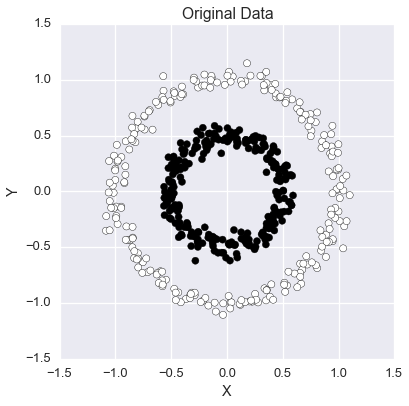

In [5]:
f, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_title("Original Data")
ax.set_xlabel("X")
ax.set_ylabel("Y")

class 0: min: 3.056 max: 4.687
class 1: min: 5.144 max: 6.132


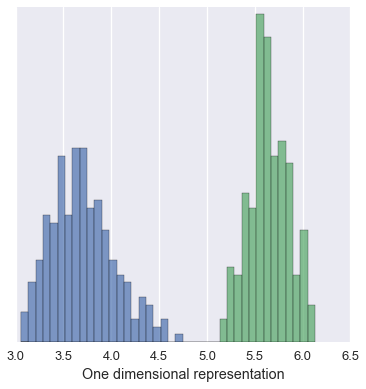

In [8]:
# use RandomTreesEmbedding to transform data
hasher = RandomTreesEmbedding(n_estimators=65, random_state=765434693, max_depth=3)
X_transformed = hasher.fit_transform(X)

pca = TruncatedSVD(n_components=1)
X_reduced = pca.fit_transform(X_transformed)

# make some unseen data to test the separation on
X_, y_ = make_circles(500, factor=0.5, random_state=745435, noise=0.05)

X2 = pca.transform(hasher.transform(X_))
y2 = y_

f, ax = plt.subplots(figsize=(6,6))

bins = 40
_=ax.hist(X2[y2==0], bins=bins, alpha=0.7, range=(X2.min(), X2.max()))
_=ax.hist(X2[y2==1], bins=bins, alpha=0.7, range=(X2.min(), X2.max()))
ax.set_yticks(())
ax.set_xlabel("One dimensional representation")
for i in (0,1):
    print "class %i: min: %.3f max: %.3f"%(i, X2[y2==i].min(), X2[y2==i].max())

In [10]:
X,y = datasets.make_hastie_10_2(random_state=2935)

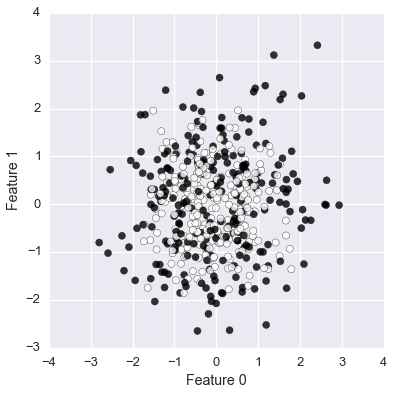

In [28]:
f, ax = plt.subplots(1, 1, figsize=(6,6))

subsample = np.random.permutation(X.shape[0])[:500]
X_, y_ = X[subsample], y[subsample]

ax.scatter(X_[:, 0], X_[:, 1], c=y_, s=50, alpha=0.8)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")

(12000, 4481)
class -1: min: 19.074 max: 22.425
class 1: min: 14.123 max: 20.494


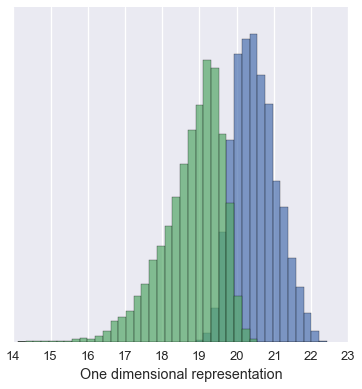

In [54]:
# use RandomTreesEmbedding to transform data
hasher = RandomTreesEmbedding(n_estimators=600,
                              random_state=7633,
                              max_depth=3)
X_transformed = hasher.fit_transform(X)
print X_transformed.shape

pca = TruncatedSVD(n_components=1)
X_reduced = pca.fit_transform(X_transformed)

# make some unseen data to test the separation on
X_, y_ = datasets.make_hastie_10_2(random_state=2935+1)

X2 = pca.transform(hasher.transform(X_))
y2 = y_

f, ax = plt.subplots(figsize=(6,6))

bins = 40
_=ax.hist(X2[y2==-1], bins=bins, alpha=0.7, range=(X2.min(), X2.max()))
_=ax.hist(X2[y2==1], bins=bins, alpha=0.7, range=(X2.min(), X2.max()))
ax.set_yticks(())
ax.set_xlabel("One dimensional representation")
for i in np.unique(y):
    print "class %i: min: %.3f max: %.3f"%(i, X2[y2==i].min(), X2[y2==i].max())

class -1: min: 457.730 max: 1043.900
class 1: min: 310.625 max: 1138.163


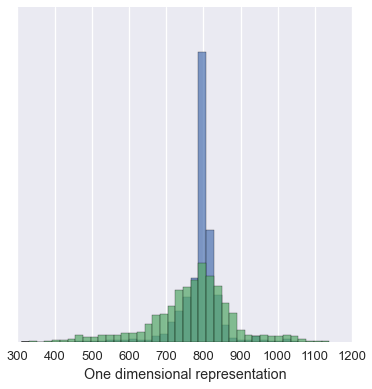

In [53]:
hasher = RandomForestRegressor(n_estimators=600,
                               random_state=7633,
                               max_depth=5,
                               n_jobs=7)
#hasher = GradientBoostingClassifier(n_estimators=300,
#                                    random_state=94,
#                                    max_depth=3)
pca = TruncatedSVD(n_components=1)

hasher.fit(X, y)
X_transformed = hasher.apply(X)

X_reduced = pca.fit_transform(X_transformed)

# make some unseen data to test the separation on
X_, y_ = datasets.make_hastie_10_2(random_state=2935+1)

X2 = pca.transform(hasher.apply(X_))
y2 = y_

f, ax = plt.subplots(figsize=(6,6))

bins = 40
_=ax.hist(X2[y2==-1], bins=bins, alpha=0.7, range=(X2.min(), X2.max()))
_=ax.hist(X2[y2==1], bins=bins, alpha=0.7, range=(X2.min(), X2.max()))
ax.set_yticks(())
ax.set_xlabel("One dimensional representation")
for i in np.unique(y):
    print "class %i: min: %.3f max: %.3f"%(i, X2[y2==i].min(), X2[y2==i].max())